In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os

import tensorflow as tf
from tensorflow import keras
print("TensorFlow version is ", tf.__version__)

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

TensorFlow version is  2.8.0


In [ ]:
!wget https://drive.google.com/u/0/uc?id=1UD68IdpVjmN9SoOp77W5UgFKPDQziRPj&export=download

--2022-02-16 07:37:49--  https://drive.google.com/u/0/uc?id=1UD68IdpVjmN9SoOp77W5UgFKPDQziRPj
Resolving drive.google.com (drive.google.com)... 108.177.97.101, 108.177.97.113, 108.177.97.139, ...
Connecting to drive.google.com (drive.google.com)|108.177.97.101|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://drive.google.com/uc?id=1UD68IdpVjmN9SoOp77W5UgFKPDQziRPj [following]
--2022-02-16 07:37:49--  https://drive.google.com/uc?id=1UD68IdpVjmN9SoOp77W5UgFKPDQziRPj
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-4k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/iuiqc5joqjihvh2oppe4ih85urlotiq4/1644997050000/02166648551890418454/*/1UD68IdpVjmN9SoOp77W5UgFKPDQziRPj [following]
--2022-02-16 07:38:11--  https://doc-04-4k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/iuiqc5joqjihvh2oppe4ih85urlotiq4/1644997050000/02166

In [ ]:
#unzip the dataset
!unzip NEU-CLS-64.zip -d ./

Archive:  NEU-CLS-64.zip
error [NEU-CLS-64.zip]:  missing 3145728 bytes in zipfile
  (attempting to process anyway)
error: invalid zip file with overlapped components (possible zip bomb)


In [ ]:
bucket_path = 'NEU-CLS-64/'
base_dir, _ = os.path.splitext(bucket_path)

In [ ]:
train_dir = os.path.join(base_dir)
validation_dir = os.path.join(base_dir)

# --------- Train --------------
# Directory with our train rs datasets
train_rs_dir = os.path.join(train_dir, 'rs')
#print ('Total training rs images:', len(os.listdir(train_rs_dir)))

# Directory with our train pa datasets
train_pa_dir = os.path.join(train_dir, 'pa')
#print ('Total training pa images:', len(os.listdir(train_pa_dir)))

# Directory with our train cr datasets
train_cr_dir = os.path.join(train_dir, 'cr')
#print ('Total training cr images:', len(os.listdir(train_cr_dir)))

# Directory with our train ps datasets
train_ps_dir = os.path.join(train_dir, 'ps')
#print ('Total training ps images:', len(os.listdir(train_ps_dir)))

# Directory with our train in datasets
train_in_dir = os.path.join(train_dir, 'in')
#print ('Total training in images:', len(os.listdir(train_in_dir)))

# Directory with our train sc datasets
train_sc_dir = os.path.join(train_dir, 'sc')
#print ('Total training sc images:', len(os.listdir(train_sc_dir)))

# Directory with our train sp datasets
train_sp_dir = os.path.join(train_dir, 'sp')
#print ('Total training sp images:', len(os.listdir(train_sp_dir)))

# Directory with our train rp datasets
train_rp_dir = os.path.join(train_dir, 'rp')
#print ('Total training rp images:', len(os.listdir(train_rp_dir)))

# Directory with our train gg datasets
train_gg_dir = os.path.join(train_dir, 'gg')
#print ('Total training gg images:', len(os.listdir(train_gg_dir)))

# --------- Validation --------------

# Directory with our validation rs datasets
validation_rs_dir = os.path.join(validation_dir, 'rs')
#print ('Total validation rs images:', len(os.listdir(validation_rs_dir)))

# Directory with our validation pa datasets
validation_pa_dir = os.path.join(validation_dir, 'pa')
#print ('Total validation pa images:', len(os.listdir(validation_pa_dir)))

# Directory with our validation cr datasets
validation_cr_dir = os.path.join(validation_dir, 'cr')
#print ('Total validation cr images:', len(os.listdir(validation_cr_dir)))

# Directory with our validation ps datasets
validation_ps_dir = os.path.join(validation_dir, 'ps')
#print ('Total validation ps images:', len(os.listdir(validation_ps_dir)))

# Directory with our validation in datasets
validation_in_dir = os.path.join(validation_dir, 'in')
#print ('Total validation in images:', len(os.listdir(validation_in_dir)))

# Directory with our validation sc datasets
validation_sc_dir = os.path.join(validation_dir, 'sc')
#print ('Total validation sc images:', len(os.listdir(validation_sc_dir)))

# Directory with our validation sp datasets
validation_sp_dir = os.path.join(validation_dir, 'sp')
#print ('Total validation sp images:', len(os.listdir(validation_sp_dir)))

# Directory with our validation rp datasets
validation_rp_dir = os.path.join(validation_dir, 'rp')
#print ('Total validation rp images:', len(os.listdir(validation_rp_dir)))

# Directory with our validation gg datasets
validation_gg_dir = os.path.join(validation_dir, 'gg')
#print ('Total validation gg images:', len(os.listdir(validation_gg_dir)))

In [ ]:
image_size = 224 # All images will be resized to 160x160
batch_size = 16

# Rescale all images by 1./255 and apply image augmentation
train_datagen = keras.preprocessing.image.ImageDataGenerator(
                rescale=1./255,
                rotation_range=40,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True,)

validation_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
                train_dir,  # Source directory for the training images
                target_size=(image_size, image_size),
                batch_size=batch_size,
                # Since we use categorical loss, we need binary labels
                class_mode='categorical')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = validation_datagen.flow_from_directory(
                validation_dir, # Source directory for the validation images
                target_size=(image_size, image_size),
                batch_size=batch_size,
                class_mode='categorical')

Found 7226 images belonging to 9 classes.
Found 7226 images belonging to 9 classes.


In [ ]:
IMG_SHAPE = (image_size, image_size, 3)

# Create the base model from the pre-trained model inception V3
base_model = tf.keras.applications.EfficientNetB7(include_top=False, input_shape=IMG_SHAPE)

258080768/258076736 [==============================] - 2s 0us/step


In [ ]:
base_model.trainable = True

In [ ]:
model_fine = tf.keras.Sequential([
  base_model,
  keras.layers.GlobalAveragePooling2D(),
  keras.layers.Dense(512, activation='relu'),
  keras.layers.Dense(9, activation='softmax')
  ])

In [ ]:
model_fine.compile(optimizer = tf.keras.optimizers.Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model_fine.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb7 (Functional)  (None, 7, 7, 2560)        64097687  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2560)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1311232   
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 4617      
Total params: 65,413,536
Trainable params: 65,102,809
Non-trainable params: 310,727
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# checkpoint
filepath="./checkpoints/weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
# Create checkpoint callback
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, verbose=1, validation=0.1, monitor='val_loss',save_best_only=True, mode='auto')  

In [ ]:
len(model_fine.trainable_variables)

713

In [ ]:
epochs = 20
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size
    
history_fine = model_fine.fit_generator(train_generator,
                                   steps_per_epoch = steps_per_epoch,
                                   epochs=epochs,
                                   workers=4,
                                   validation_data=validation_generator,
                                   validation_steps=validation_steps,
                                   callbacks=[checkpoint])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
451/451 [==============================] - 581s 1s/step - loss: 0.5824 - accuracy: 0.8155 - val_loss: 6.6004 - val_accuracy: 0.1317

Epoch 00001: val_loss improved from inf to 6.60037, saving model to ./checkpoints/weights-improvement-01-0.13.hdf5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/20
451/451 [==============================] - 524s 1s/step - loss: 0.3099 - accuracy: 0.8954 - val_loss: 4.4234 - val_accuracy: 0.1488

Epoch 00002: val_loss improved from 6.60037 to 4.42344, saving model to ./checkpoints/weights-improvement-02-0.15.hdf5
Epoch 3/20
451/451 [==============================] - 524s 1s/step - loss: 0.2486 - accuracy: 0.9166 - val_loss: 6.4338 - val_accuracy: 0.0276

Epoch 00003: val_loss did not improve from 4.42344
Epoch 4/20
451/451 [==============================] - 524s 1s/step - loss: 0.2036 - accuracy: 0.9269 - val_loss: 1.0892 - val_accuracy: 0.6068

Epoch 00004: val_loss improved from 4.42344 to 1.08915, saving model to ./checkpoints/weights-improvement-04-0.61.hdf5
Epoch 5/20
451/451 [==============================] - 520s 1s/step - loss: 0.1736 - accuracy: 0.9413 - val_loss: 5.1639 - val_accuracy: 0.1682

Epoch 00005: val_loss did not improve from 1.08915
Epoch 6/20
451/451 [==============================] - 524s 1s/step - loss: 0.1894 - 

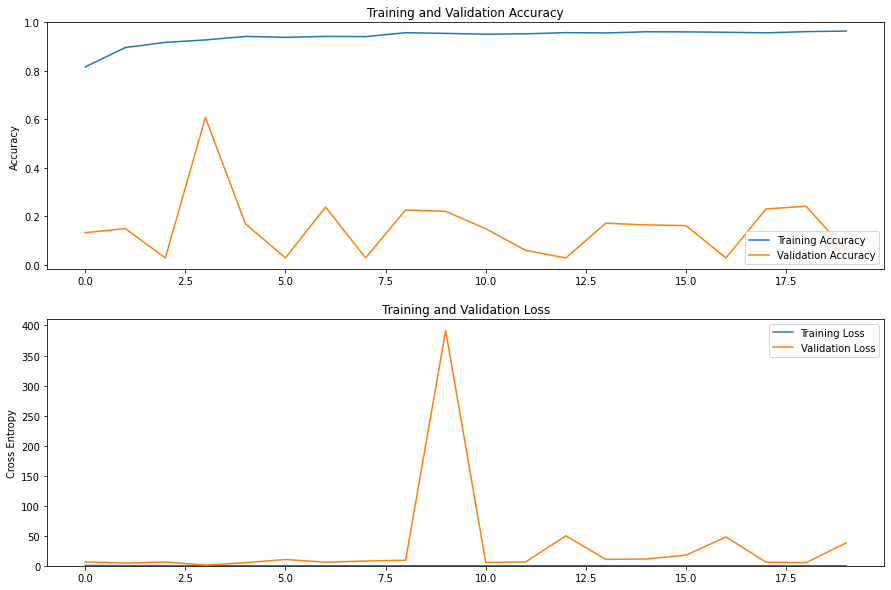

In [ ]:
acc = history_fine.history['accuracy']
val_acc = history_fine.history['val_accuracy']

loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']

plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

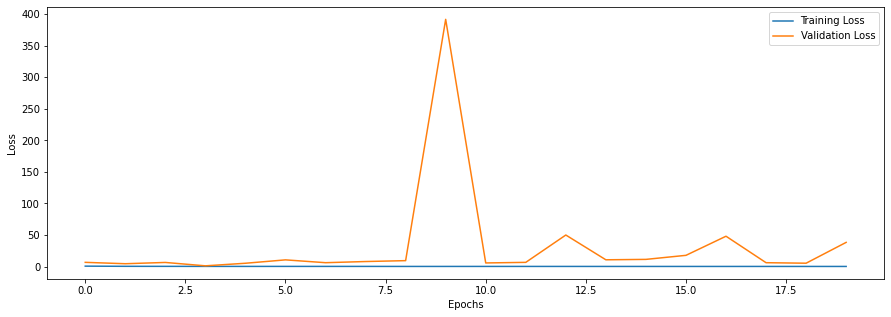

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(history_fine.history['loss'], label='Training Loss')
plt.plot(history_fine.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
!pip install scikit-plot


In [ ]:
import pandas as pd
data = pd.read_csv('sample_submission.csv')

In [ ]:
data.head()

,ImageId,EncodedPixels,ClassId
0,0000f269f.jpg,1 409600,0
1,000ccc2ac.jpg,1 409600,0
2,002451917.jpg,1 409600,0
3,003c5da97.jpg,1 409600,0
4,0042e163f.jpg,1 409600,0


In [ ]:
!kaggle competitions download -c severstal-steel-defect-detection

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
